In [20]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from pathlib import Path
import re
from collections import Counter
import matplotlib.pyplot as plt

def download_nltk_resources():
    try:
        nltk.download("stopwords", quiet=True)
        nltk.download("wordnet", quiet=True)
    except Exception as e:
        print(f"Error downloading NLTK resources: {e}")

download_nltk_resources()

In [21]:
transcript_dir = Path("/work/pi_vcpartridge_umass_edu/ytb_csv/")

df = pd.read_csv(transcript_dir / "transcripts_normalized.csv", header=0)
df.dropna(subset=["transcript"], inplace=True)
df.head()

,video_id,transcript
0,AAHiZ-c88ec,man im getting frustrated water heater deliver...
1,AEsRr-ZnzNc,start give shout rokukun vyonder harrystack go...
2,AJpzk-aFZPU,10 minute test number exploding apple alright ...
3,AONXX-h9SdI,gonna play something brand new album came octo...
5,APerX-RLJxo,2010 toyota corolla fourdoor sedan automatic t...


In [22]:
lex_div = []
for idx, row in df.iterrows():
    transcript = row["transcript"]
    words = transcript.split()
    word_freq = Counter(words)
    lex_div.append(len(word_freq) / len(words))

df["lex_div"] = lex_div

In [23]:
df["lex_div"].describe()

count    2316.000000
mean        0.634876
std         0.241182
min         0.002506
25%         0.457831
50%         0.635916
75%         0.825145
max         1.000000
Name: lex_div, dtype: float64

35
[('oh', 1340), ('im', 971), ('ha', 803), ('go', 642), ('dance', 401), ('la', 399), ('da', 366), ('gonna', 265), ('doo', 216), ('today', 211), ('yeah', 210), ('pop', 209), ('happy', 203), ('back', 200), ('stitch', 199), ('beep', 199), ('sorry', 181), ('man', 168), ('sure', 158), ('pimp', 141)]


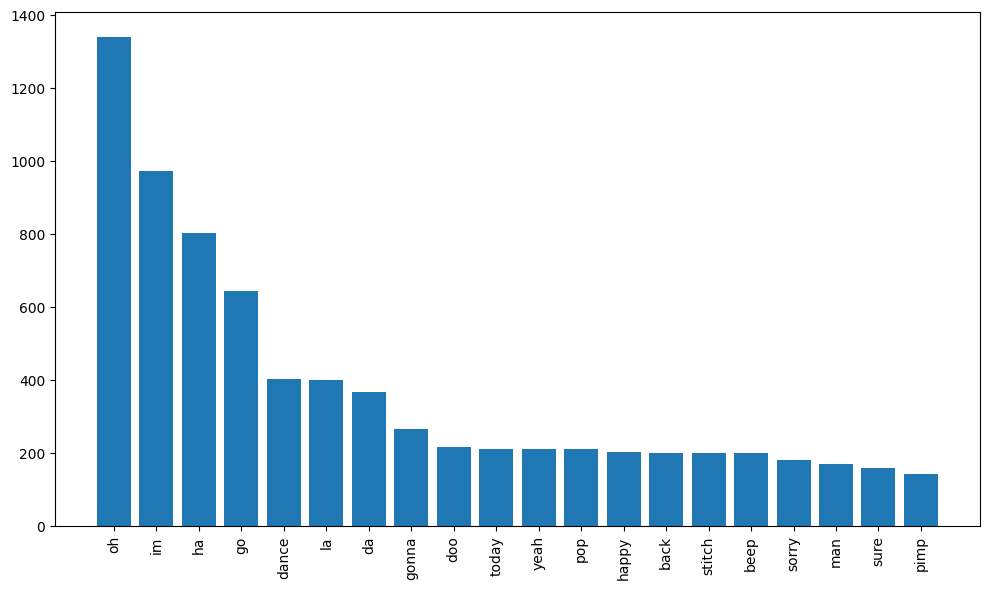

In [25]:
low_lex = df[df["lex_div"] < 0.1]
print(len(low_lex))
all_words = " ".join(low_lex["transcript"]).split()
word_freq = Counter(all_words)
print(word_freq.most_common(20))
word, count = zip(*word_freq.most_common(20))
plt.figure(figsize=(10, 6))
plt.bar(word, count)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

1594
[('im', 2835), ('like', 2293), ('get', 1613), ('one', 1588), ('know', 1514), ('dont', 1297), ('going', 1279), ('got', 1210), ('go', 1164), ('see', 1075), ('oh', 1042), ('thats', 1008), ('yeah', 950), ('right', 924), ('time', 883), ('let', 875), ('want', 833), ('well', 827), ('really', 816), ('good', 785)]


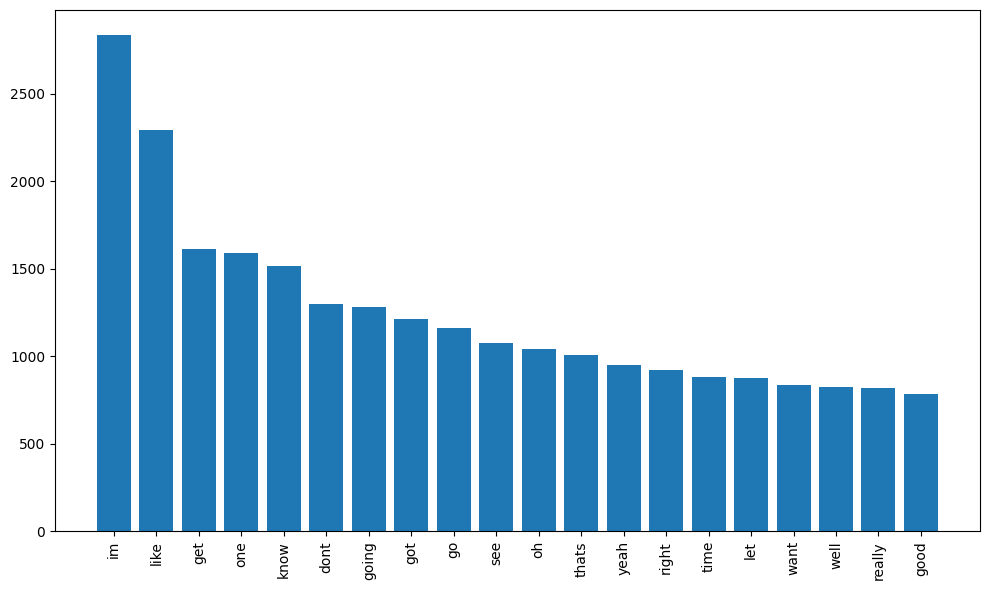

In [26]:
high_lex = df[df["lex_div"] > 0.5]
print(len(high_lex))
all_words = " ".join(high_lex["transcript"]).split()
word_freq = Counter(all_words)
print(word_freq.most_common(20))
word, count = zip(*word_freq.most_common(20))
plt.figure(figsize=(10, 6))
plt.bar(word, count)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()